Created on July 7th, 2022

Last edit on July 7th, 2022

# Estimation of effective tunneling in a triangular lattice shaken by phase modulation

<div style="text-align: right;">
<font size="4">Editor: Hideki Ozawa</font>
</div>

---

Reference.)

[1] [A.Zenesini *et. al.*, "Tunneling control and localization for Bose-Einstein condensates in a frequency modulated optical lattice
", arXiv (2009)](https://arxiv.org/abs/0912.1241)

The expressions for the frequency modulations for triangular lattice beams:
\begin{eqnarray}
\delta \phi_1 (t) &=& 0\\
\delta \phi_2 (t) &=&  +\phi_x {\rm {sin}}(\Omega t) + \phi_y {\rm{cos}}(\Omega t) = \sqrt{\phi_x^2 +\phi_y^2} {\rm{sin}}(\Omega t + \alpha) \\
\delta \nu_3 (t) &=& -\phi_x {\rm {sin}}(\Omega t) + \phi_y {\rm{cos}}(\Omega t) =\sqrt{\phi_x^2 +\phi_y^2} {\rm{sin}}(\Omega t + \pi - \alpha)  \\
\alpha &=& \rm{arcsin}\left(\frac{\phi_y}{\sqrt{\phi_x^2+\phi_y^2}} \right)
\end{eqnarray}
The notation for the effective tunneling processes:
\begin{eqnarray}
J &\equiv& J_{21}^{\rm{eff}} \\
J' &\equiv& J_{32}^{\rm{eff}}  = J_{13}^{\rm{eff}} \\
J &=& {\rm{J_{B0}}} (K)J^{\rm{bare}}\\
J' &=& {\rm{J_{B0}}} (K')J^{\rm{bare}}\\
K &=& \frac{m \Omega a^2}{\hbar} \frac{\phi_y}{2 \pi} \\
K' &=& \frac{m \Omega a^2}{2\hbar} \frac{\sqrt{9 \phi_x^2 + \phi_y^2}}{2 \pi}
\end{eqnarray}
, where $ {\rm{J_{B0}}} $ means the 0-th order Bessel function of the first kind, $a = \frac{2}{3}\lambda$ the lattice constant, $m$ the atomic mass, and $\hbar$ the reduced Plant constant, respectively.

In [65]:
import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
print('matplotlib: '+matplotlib.__version__)
from scipy.constants import * 
import matplotlib.pyplot as plt
from scipy.special import jv
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

numpy: 1.19.2
matplotlib: 3.3.2


In [66]:
# lambda_L = 830*10**(-9) #[m] wavelength of triangular lattice beam in Segstock group 
lambda_L=1064*10**(-9) #[m]QMBD
h_bar = h/(2*np.pi) #Converted Plank constant
mrb = 87*10**(-3)/N_A #[kg] atom mass of 87Rb
a = 2/3*lambda_L
Omega = 2*np.pi*1.1*1e3 #[Hz] Shaking frequency

In [67]:
y_list = np.linspace(0, 2,100)*a
K_list = mrb*a*Omega/h_bar*y_list
Jv_list = jv(0, K_list)

x = np.linspace(0,2, 100)*a
y = np.linspace(0,2, 100)*a
X, Y = np.meshgrid(x, y)
Z = list(map(lambda vx, vy: jv(0,  mrb*a*Omega/(2*h_bar)*np.sqrt(9*vx**2+vy**2)), X,Y))

Text(0.5, 1.0, "$J'/J^{bare}$")

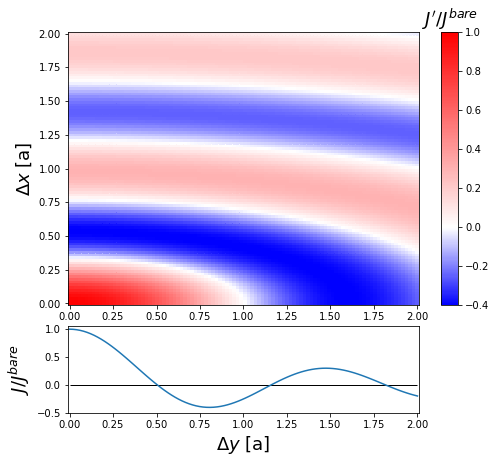

In [68]:
norm = mcolors.TwoSlopeNorm( vcenter=0.0, vmin=-0.4, vmax=1 )

fig =plt.figure(figsize=[7,7])
ax1 = fig.add_subplot(1,1,1)
mappable = ax1.pcolormesh(Y/a,X/a,Z, cmap='bwr', norm=norm, shading='Auto') 
ax1.set_ylabel(r'$\Delta x$ [a]', size=18)
divider1 = make_axes_locatable(ax1)
ax1X = divider1.append_axes("bottom", 1.2, pad=0.3, sharex=ax1)
ax1X.plot(y_list/a,Jv_list)
ax1X.set_ylabel(r"$J / J^{bare}$", size=18)
ax1X.set_xlabel(r'$\Delta y$ [a]',size=18)
ax1X.set_ylim(-0.5, 1.05)
ax1X.hlines(y=0,xmin=0, xmax=2, colors='black', linewidths=1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"$J'/J^{bare}$", fontsize=18)

In [69]:
controlVoltageToAM = 8 #[V] control voltage from NI-DAQ to WF1968 mod. in via buffer amp
modulationSignalVpp = 5 #[V] Amplitude of modulation singal
bufferAmpForAM = 1/8 # gain of buffer amp for modulatin sinal
PMdeviation = 359.9 #[degree] FM deviation used in RF source
bufferAmpForFM = 1 # gain of buffer amp for RF source

In [70]:
phaseModAmplitude = (controlVoltageToAM*bufferAmpForAM+1)/2*modulationSignalVpp*bufferAmpForFM/5*PMdeviation #[degree]
dx = phaseModAmplitude/360*a*np.sin(np.pi/6)
dy = phaseModAmplitude/360*a*np.sin(np.pi/3)

In [71]:
k=mrb*a*Omega/h_bar*dy
kp = mrb*a*Omega/(2*h_bar)*np.sqrt(9*dx**2+dy**2)
j = jv(0,k)
jp = jv(0,kp)
amp = np.sqrt(dx**2+dy**2)
alpha = np.arcsin(dy/amp)
print('K=%.02f'%(k))
print('Kp=%.02f'%(kp))
print('J/J_bare=%.02f'%(j))
print('Jp/J_bare=%.02f'%(jp))
print('Amplitude=%.02f'%(amp/a)+"[a]")
print('theta = %.02f'%(alpha*180/np.pi)+"[degree]")

K=4.12
Kp=4.12
J/J_bare=-0.39
Jp/J_bare=-0.39
Amplitude=1.00[a]
theta = 60.00[degree]


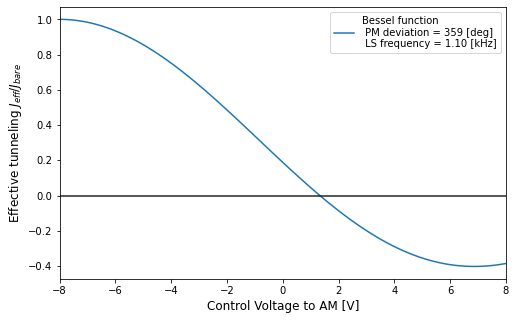

In [72]:
controlVoltage_list = np.linspace(-8,8,100)
dy_list = np.sin(np.pi/3)*(controlVoltage_list*bufferAmpForAM+1)/2*modulationSignalVpp*bufferAmpForFM/5*PMdeviation/360*a
k_list =  2*np.pi*mrb*a*Omega*dy_list/(constants.h)
jv_list = jv(0,k_list)


fig = plt.figure(figsize=[8,5])
plt.plot(controlVoltage_list,jv_list,label='Bessel function \n PM deviation = %3d [deg] \n LS frequency = %.02f [kHz]'%(PMdeviation, Omega/(2*np.pi*1e03)))
plt.xlabel(r'Control Voltage to AM [V]',fontsize=12)
plt.ylabel(r'Effective tunneling $J_{eff}/J_{bare}$',fontsize=12)
plt.axhline(y=0,xmin=0,xmax=10,color="#222222")
plt.xlim(np.min(controlVoltage_list),np.max(controlVoltage_list))
# plt.axvline(x=K0,ymin=-0.5,ymax=2,color="#dd2222",linestyle='--',label='K0 when Vctrl=%.02f'%(controlVoltageToAM))
plt.legend()